In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.ticker as ticker
import datetime
import pickle
sys.path.insert(0, os.path.abspath('../'))
import c19all

df = pickle.load(open( '../../output/pickles/df_us_combined.p', 'rb')).reset_index()

''' Define the analytic dataset
    count_of:   required, `cases_nyt`, `cases_jnu`, `deaths_nyt`, `deaths_jhu`, `recovered` (JHU), `active` (JHU)
    start_date: required, >= 2020-01-02
    location:   optional, comment out the declaration for national level data. Options are:
        `region`, `sub_region`, `state`, `county`. For county, value is ['county_name', 'state_name']
'''
count_of = 'cases_nyt'
start_date = pd.to_datetime('2020-03-01')
location = {
    'type': 'county',
    'value': ['Grafton', 'New Hampshire']
}

if 'location' in locals():
    if location['type'] == 'county':
        county = location['value'][0]
        state = location['value'][1]
        df = df[df.county == county]
        df = df[df.state == state]
        ylabel = f'{county} county, {state} {count_of}'
        title = f'New Covid-19 {count_of} per day in {county} county, {state}'
    else:
        df = df[df[location['type']] == location['value']]
        ylabel = f'{location["value"]} {location["type"]} {count_of}'
else:
    ylabel = f'US { count_of}'



ModuleNotFoundError: No module named 'c19all'

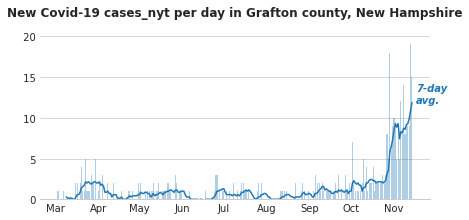

In [56]:
def monday_of_week(row):
    return datetime.datetime.strptime(row.year_week_string + '-1', "%Y-W%W-%w")

df = df[df.date >= start_date]
df['count_of_diff'] = df[count_of].diff()
df['count_of_diff_7_day_mean'] = df.count_of_diff.rolling(7).mean()
df = df.iloc[1:]

fig = plt.figure(figsize=(7,3))

ax = fig.add_subplot(111)
ax.bar('date', 'count_of_diff', data=df, alpha=0.35)
ax.plot('date', 'count_of_diff_7_day_mean', data=df)
ax.set_ylim(ymin=0)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.0f')) 
ax.xaxis.set_major_locator(dt.MonthLocator())
ax.xaxis.set_major_formatter(dt.DateFormatter('%b'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.grid(axis='x')

plt.style.use('seaborn-whitegrid')
plt.text(df.date.iloc[-1] + datetime.timedelta(days=3), df.count_of_diff_7_day_mean.iloc[-1], "7-day\navg.", color='#1f77b4', style='italic', weight='bold')
plt.title(title, pad=20, weight='bold')
# plt.show()

# Comment out plt.show() and uncomment these lines to save an SVG
plt.subplots_adjust(top=0.8)
plt.savefig('../../.images/rates.svg')

